# Capstone Project  - Book 1: Classifying real vs fake sneakers via images

## Problem Statement

The sneaker resale market is an estimated 2 billion USD in secondary market in 2019. Estimated to be USD6 billion by 2025 according to research firm, Cowen & Co. Due to the lucrative nature of these commodities, there is the inevitible rise of counterfeits. The counterfeit sneakers industry are a USD450 million market and we want to be able to differentiate real and fake sneakers. 

Our task is to build a classifier that is able to differentiate between real and fake sneakers. 
Our primary audience will be the sneaker brands. Some of the negative impacts of counterfeit sneakers includes undercutting sales of brands, damaging reputation and dealing with the lashback from consumers.

To do so, we will first be scrapping data from reddit and other sneaker resources and using classification models such as CNN and xxxx to diffentiate between the authentic and the replicas. We will measure our success using several classification metrics including xxxx and yyyy. 

With this, we also hope to help buyers inform themselves and to stay away from counterfeits. Empowering the public with information, they will be able to make the right decision which could help to reduce the lucrative nature of fake sneakers. 


## Executive Summary

As the data science team in Nutrino, we have been tasked to build a classifier to improve core product of the company, which is to provide nutrition related data services and analytics. We are also tasked to identify patterns on 2 currently trending diets, keto and vegan. 

Our classifier was successful in predicting at an above 90% accuracy score. We also identified patterns in the motivations and preferences of the 2 groups of subredditors, which will help determine the kind of customer engagement with teach group. 


## Notebooks:
- [Data Scrapping and Cleaning](./book1_data_scrapping_cleaning.ipynb)
- [EDA](./book2_eda.ipynb)
- [Modeling and Recommendations](./book3_preprocesing_modeling_recommendations.ipynb)


## Contents:
- [Import Libraries](#Import-Libraries)
- [Data Scrapping](#Data-Scrapping)
- [Data Cleaning](#Data-Cleaning)
- [Save Data to CSV](#Save-Data-to-CSV)

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
from numpy import asarray
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as img

## Import Data

In [2]:
rep = pd.read_csv("./datasets/rep_url_1k.csv")
auth = pd.read_csv("./datasets/auth_url_1k.csv")

In [3]:
df = pd.concat([rep,auth],axis=0)
df.head()

,url,label,is_rep
0,http://i.imgur.com/JnFHwvz.jpg,repsneakers,rep
1,http://i.imgur.com/j1ehWvb.jpg,repsneakers,rep
2,http://i.imgur.com/3cxOfDC.jpg,repsneakers,rep
3,http://i.imgur.com/rVwqpP0.jpg,repsneakers,rep
4,http://i.imgur.com/WAvnvm0.jpg,repsneakers,rep


In [11]:
#reset index
print(df.loc[0,'url'])
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

In [9]:
df['name'] = df['url'].map(lambda x: x.split('/')[-1])

In [12]:
df.head()

,url,label,is_rep,name
0,http://i.imgur.com/JnFHwvz.jpg,repsneakers,rep,JnFHwvz.jpg
1,http://i.imgur.com/j1ehWvb.jpg,repsneakers,rep,j1ehWvb.jpg
2,http://i.imgur.com/3cxOfDC.jpg,repsneakers,rep,3cxOfDC.jpg
3,http://i.imgur.com/rVwqpP0.jpg,repsneakers,rep,rVwqpP0.jpg
4,http://i.imgur.com/WAvnvm0.jpg,repsneakers,rep,WAvnvm0.jpg


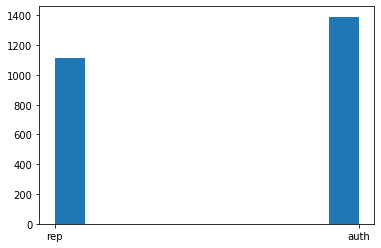

In [31]:
plt.hist(df['is_rep']);

In [ ]:
#convert is_rep to [1,0] and [0,1] or use utils
#df['is_rep'] = df['is_rep'].map(lambda )

## Practice with Pillow

In [4]:
#how to open an image
path = './datasets/images/rep/XOB3FbA.jpg'
image = Image.open(path)

print(image.format)
print(image.mode)
print(image.size)
#image.show()

JPEG
RGB
(810, 1080)


uint8
(1080, 810, 3)


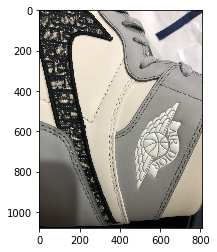

In [5]:
#load image as pixel array
data = img.imread(path)

#summarize shape of pixel array
print(data.dtype)
print(data.shape)

#display array as image
plt.imshow(data)
plt.show()

In [8]:
# convert image to numpy array
data = asarray(image)

# summarize shape
print(data.shape)

# create Pillow image
image2 = Image.fromarray(data)

# summarize image details
print(image2.format)
print(image2.mode)
print(image2.size)

(1080, 810, 3)
None
RGB
(810, 1080)


## Resize Images

In [34]:
#resize images
def resize_img(name, label, resize_config = (100,50)):
    temp_path = f'./datasets/images/{label}/{name}'
    img = Image.open(temp_path)
    
    #resizing
    new_img = img.resize(resize_config, Image.ANTIALIAS)
    
    #flatten image during return
    return np.array(new_img).flatten().tolist()

In [ ]:
img_array = []

for i in range(df.shape[0]+1):
    print(f"resizing image {i} of {df.shape[0]}...")
    try:
        img_array.append(resize_img(df.loc[i,'name'],df.loc[i,'is_rep']))
    except FileNotFoundError:
        pass

In [46]:
img_array[0]

[249,
 251,
 250,
 249,
 251,
 250,
 249,
 251,
 250,
 250,
 252,
 251,
 250,
 252,
 251,
 251,
 253,
 252,
 251,
 253,
 252,
 251,
 253,
 252,
 251,
 253,
 252,
 251,
 253,
 252,
 252,
 254,
 253,
 252,
 254,
 253,
 252,
 254,
 253,
 252,
 254,
 253,
 252,
 254,
 253,
 254,
 255,
 255,
 254,
 255,
 255,
 254,
 255,
 255,
 254,
 255,
 255,
 254,
 255,
 255,
 254,
 255,
 255,
 254,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255

## Convert to BW

In [9]:
#convert image to black and white
image.convert(mode='L')